In [36]:
#!/usr/bin/python
import numpy as np
from os.path import join
from os.path import isdir
from os import mkdir
import sys

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (20.0, 4.0)
matplotlib.rcParams['savefig.dpi'] = 200
matplotlib.rcParams['font.size'] = 14
# matplotlib.rcParams['figure.dpi'] = 400
def prefix(i,zeros):
    s = str(i)
    while(len(s) < zeros):
        s = '0' + s
    return s

EXPERIMENT_NUMBER = 2
path = join('/homes/lm1015/v/data/2016_06_20/',prefix(EXPERIMENT_NUMBER,3))
ssv_path = join(path,'numerical_data')
# save_path = join(path,'graphs')
# save_path_pdf = join(save_path,'pdf')

# if not isdir(save_path):
#     mkdir(save_path)

# if not isdir(save_path_pdf):
#     mkdir(save_path_pdf)

x_axis = np.loadtxt(join(ssv_path,'x_axis.ssv'))
lmsq_axis = np.loadtxt(join(ssv_path,'lmsq.ssv'))
cent_axis = np.loadtxt(join(ssv_path,'cross_entropy.ssv'))
accu_axis = np.loadtxt(join(ssv_path,'naive_accuracy.ssv'))
per_au = np.load(join(ssv_path,'per_au_accuracy.npz'))
validation_auac_axis = per_au['validation_metrics']
train_auac_axis = per_au['train_metrics']
threshold_values = per_au['threshold_values']
test_threshold_data = per_au['test_threshold_data']

def au(x_axis,auac_axis,prefix,smooth):

    N,classes,calcs = auac_axis.shape
    for i in xrange(classes):
        for j in xrange(calcs):
            for k in xrange(N):
                if np.isnan(auac_axis[k,i,j]):
                    auac_axis[k,i,j] = 0.0

    # scaling_factor = 10
    # if True:
    #     nN = N/scaling_factor
    #     nxaxis = np.zeros(nN)
    #     smoothed = np.zeros((nN,classes,calcs))
    #
    #     for i in xrange(classes):
    #         for j in xrange(calcs):
    #             for n in xrange(nN):
    #                 l = n*scaling_factor
    #                 r = (n+1)*scaling_factor
    #                 if r == N:
    #                     nxaxis[n] = x_axis[r-1]
    #                 else:
    #                     nxaxis[n] = x_axis[r]
    #                 smoothed[n,i,j] = auac_axis[l:r,i,j].mean()
    #     x_axis, auac_axis = (nxaxis, smoothed)
    if smooth:
        for i in xrange(classes):
            for j in xrange(4):

                first = auac_axis[0,i,j]
                last = auac_axis[-1,i,j]
                FILTER_ORDER = 10
                auac_axis[:,i,j] = np.convolve(auac_axis[:,i,j],np.ones(FILTER_ORDER)/float(FILTER_ORDER), 'same')

                auac_axis[0,i,j] = first
                auac_axis[-1,i,j] = last

    if prefix != 'test':
        f, ((ax1, ax2,ax3, ax4)) = plt.subplots(1, 4, sharex='col', sharey='row')
        axes = [ax1, ax2,ax3, ax4]
    else:
        f, ((ax1, ax2,ax3)) = plt.subplots(1, 3, sharex='col', sharey='row')
        axes = [ax1, ax2,ax3]
    
    titles = ['precision','recall','f1 score','area under roc']
    for i in xrange(classes):
        for j in xrange(len(axes)):
            axes[j].set_title(titles[j],fontsize=19)
            axes[j].plot(x_axis, auac_axis[:,i,j],label=str(i))
            axes[j].set_ylim(-0.1,1.1)
            axes[j].set_xlim(-0.1,x_axis[-1]*1.1)
            if prefix != 'test':
                axes[j].set_xlabel('training iteration')
            else:
                axes[j].set_xlabel('threshold')
    art = []
    lgd = plt.legend(loc=2, bbox_to_anchor=(1, 1), ncol=1)
    art.append(lgd)
    
    if prefix != 'test':
        labels = ax4.get_xticklabels()
        plt.setp(labels, rotation=30, fontsize=14)
    
    labels = ax3.get_xticklabels()
    plt.setp(labels, rotation=30, fontsize=14)
    
    labels = ax2.get_xticklabels()
    plt.setp(labels, rotation=30, fontsize=14)
    
    labels = ax1.get_xticklabels()
    plt.setp(labels, rotation=30, fontsize=14)
    
    plt.suptitle(prefix,fontsize=50,y=1.2)
    plt.show()

    if prefix == 'test':
        print 'Test ROC values for each class (independant of threshold):'
        print 'class\troc'
        for i in xrange(classes):
            val = auac_axis[0,i,3]
            print i,'\t',round(val,2),
            if val < 0.6:
                print 'fail'
            elif val < 0.7:
                print 'poor'
            elif val < 0.8:
                print 'fair'
            elif val < 0.9:
                print 'good'
            else:
                print 'excellent'
            
        ,
#     plt.savefig(
#         join(save_path,prefix+'_per_au.png'),dpi=400, additional_artists=art,
#         bbox_inches="tight")
#     plt.savefig(
#         join(save_path_pdf,prefix+'_per_au.pdf'),additional_artists=art,
#         bbox_inches="tight")

# Cost Functions:

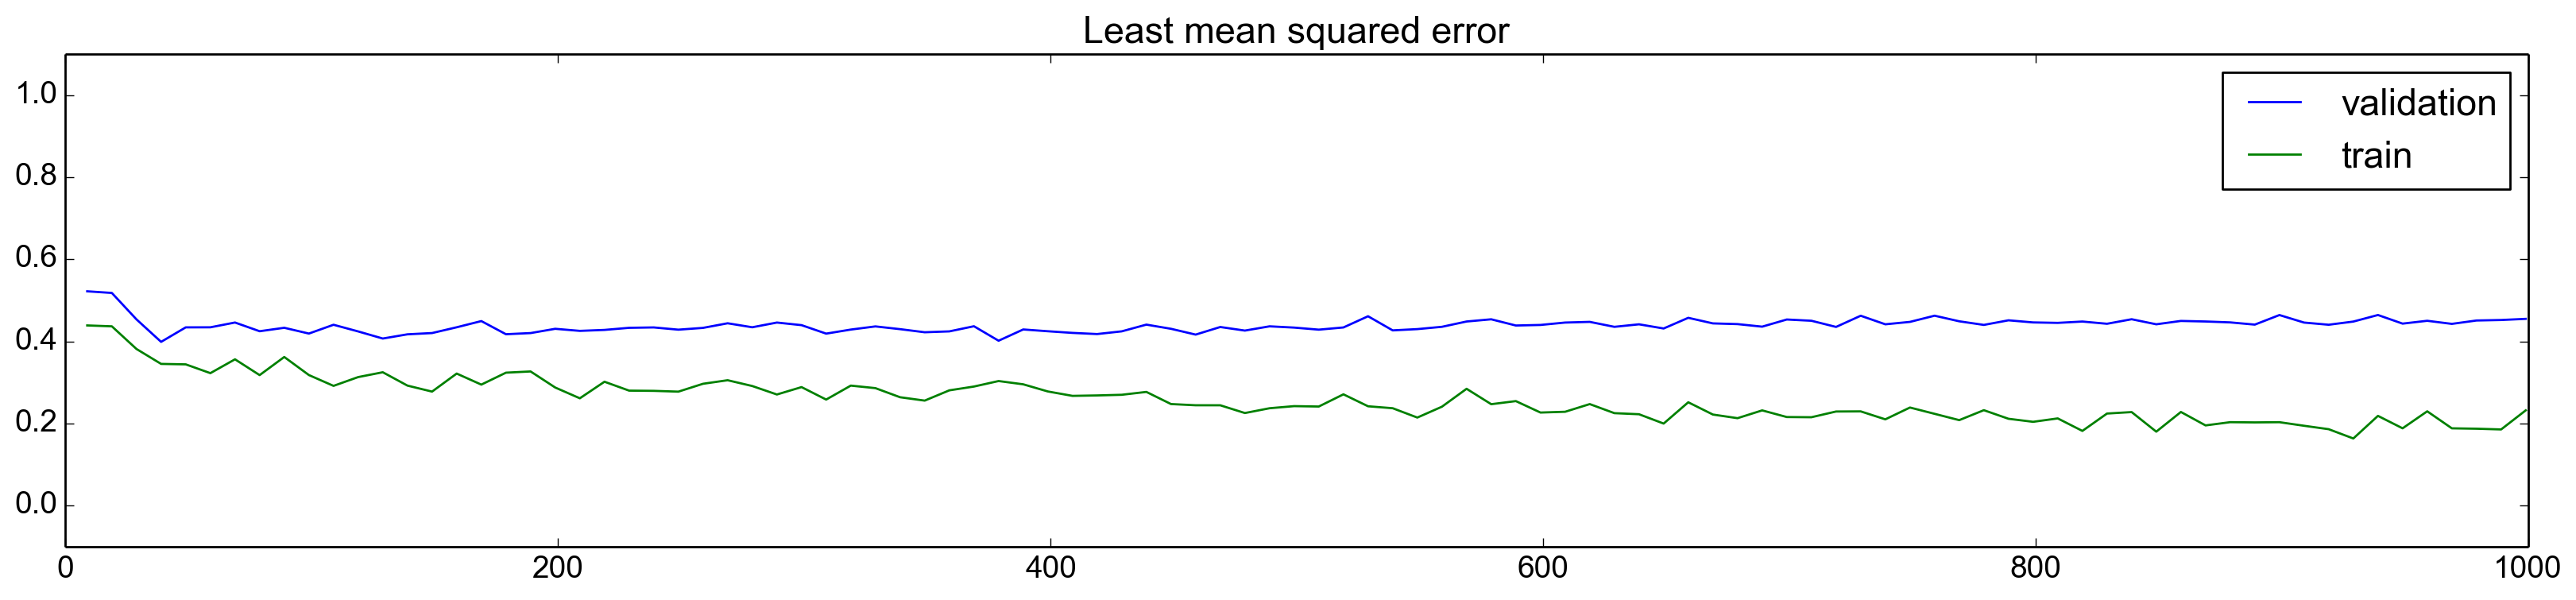

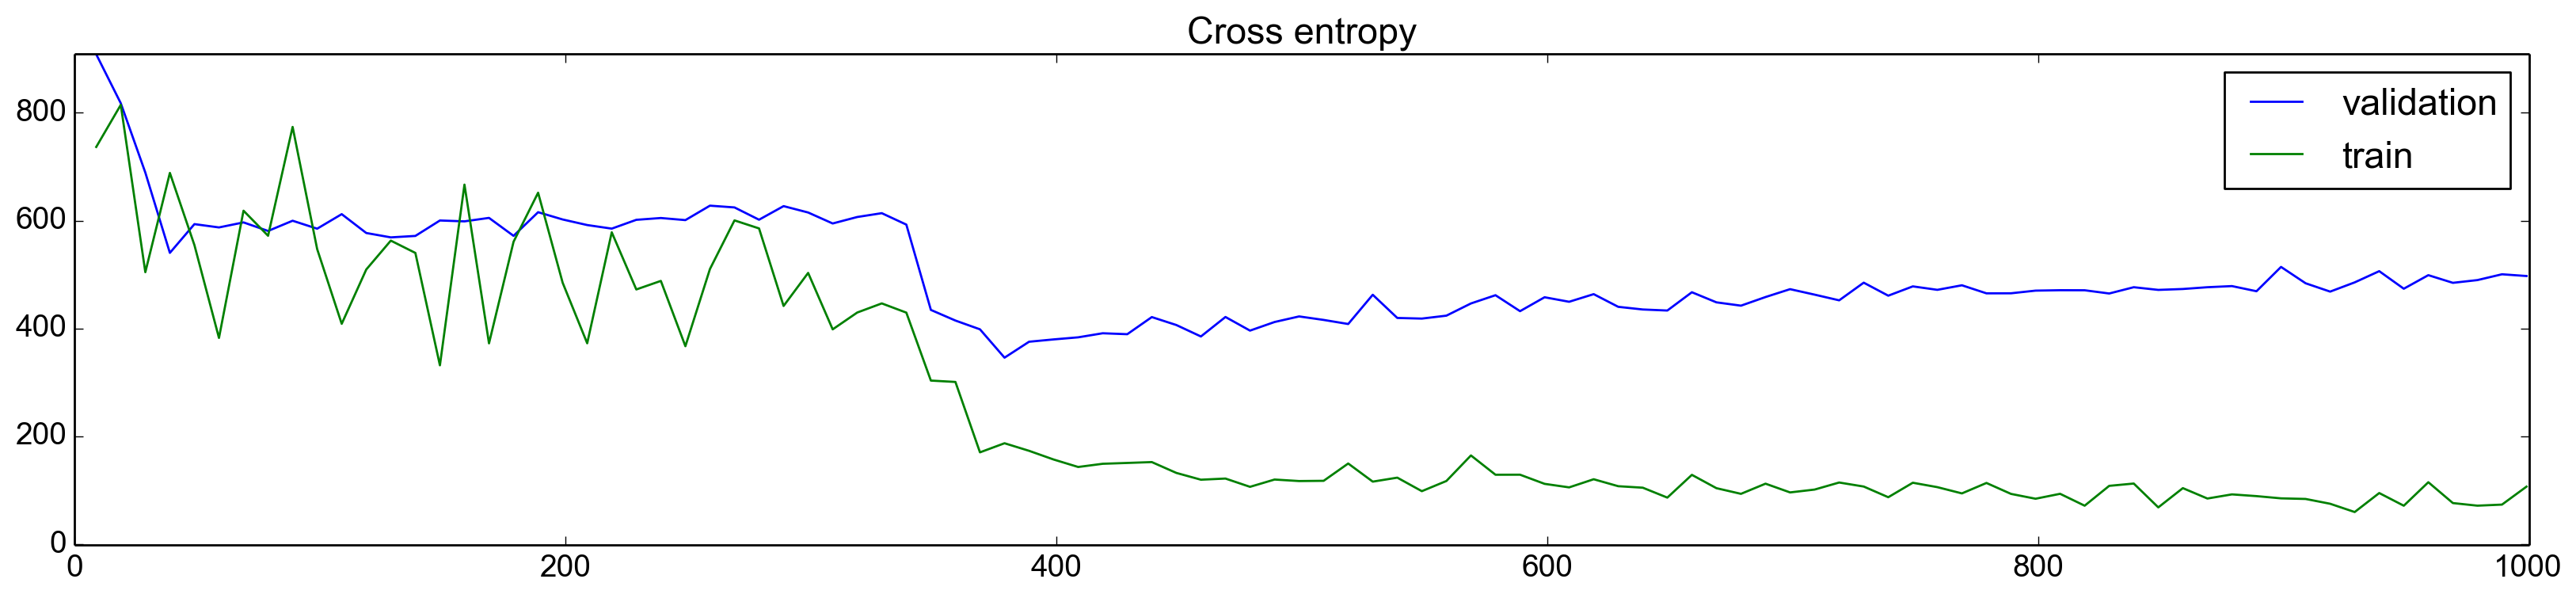

In [32]:
plt.figure()
plt.title('Least mean squared error')
plt.plot(x_axis,lmsq_axis[0,:],label='validation')
plt.plot(x_axis,lmsq_axis[1,:],label='train')
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()
# plt.savefig(join(save_path,'lmsq.png'),dpi=400)
# plt.savefig(join(save_path_pdf,'lmsq.pdf'))

plt.figure()
plt.title('Cross entropy')
plt.plot(x_axis,cent_axis[0,:],label='validation')
plt.plot(x_axis,cent_axis[1,:],label='train')
plt.legend()
plt.ylim(-1.0,cent_axis.max()+1.0)
plt.show()
# plt.savefig(join(save_path,'cross_entropy.png'),dpi=400)
# plt.savefig(join(save_path_pdf,'cross_entropy.pdf'))

# Test Sets

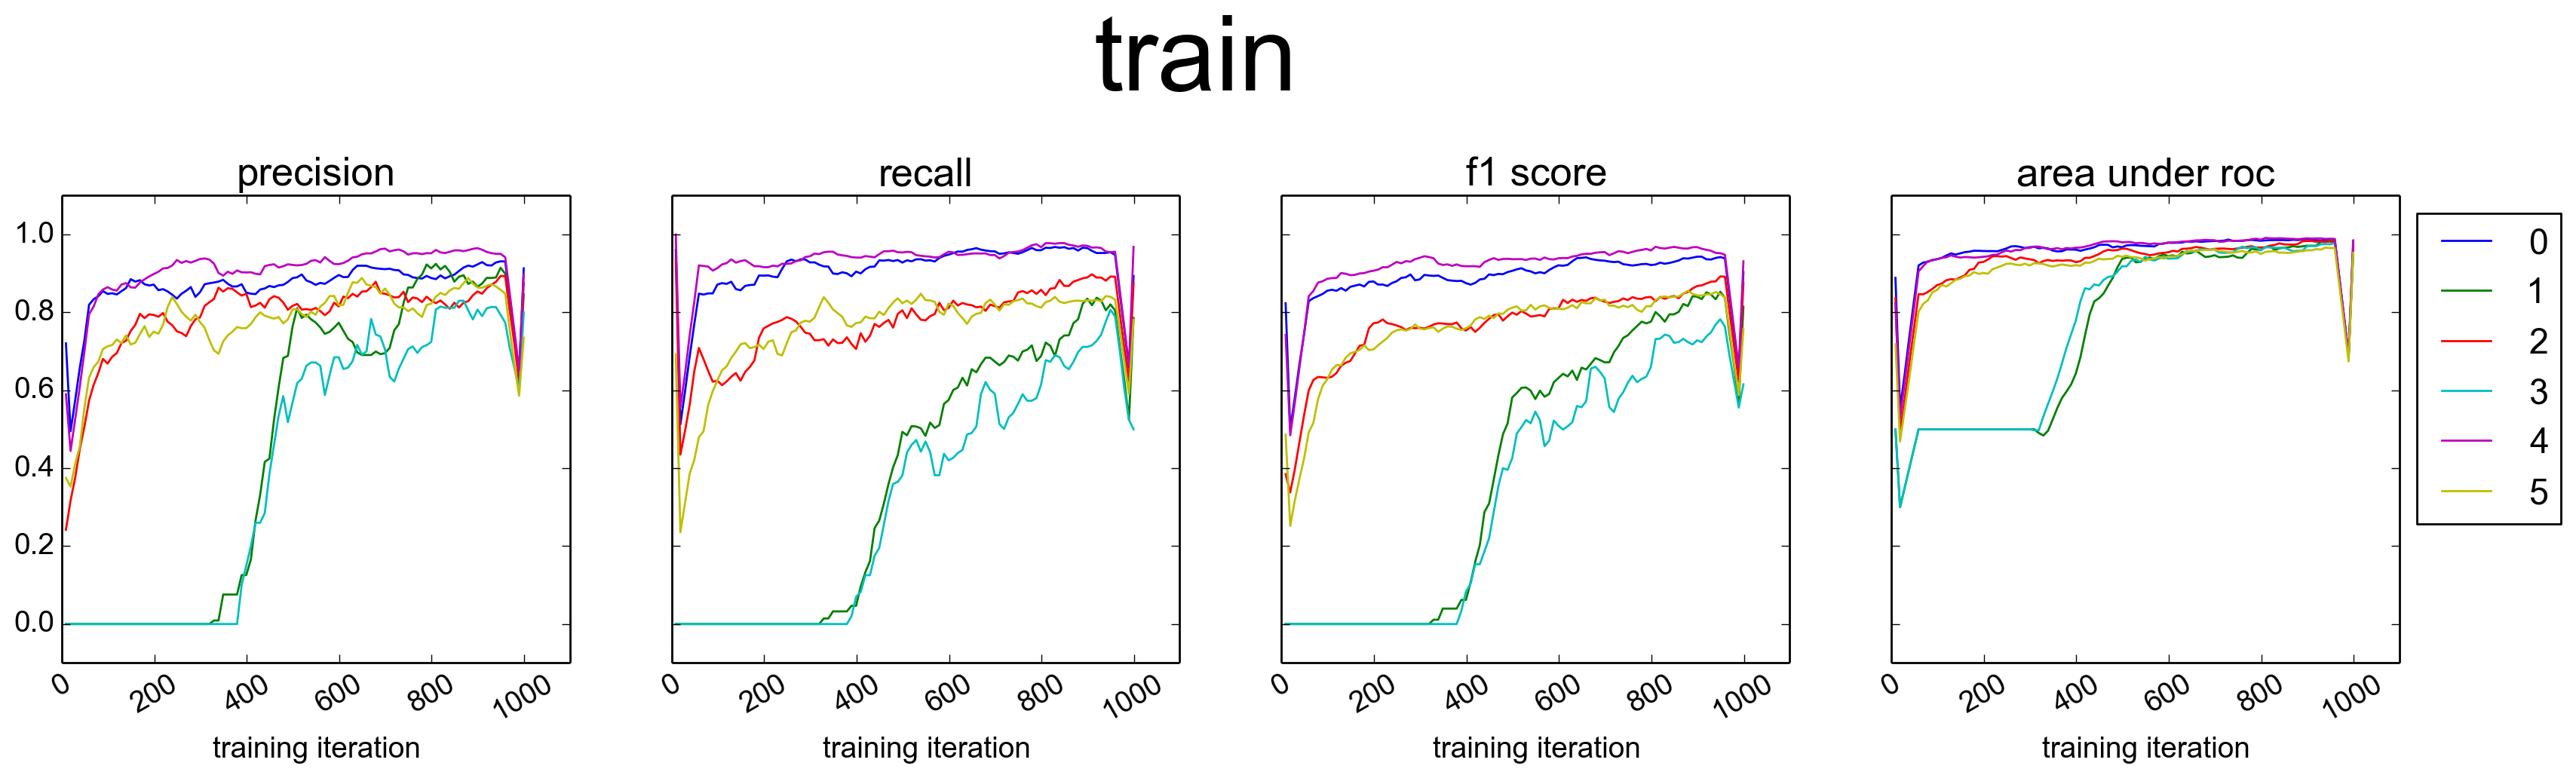

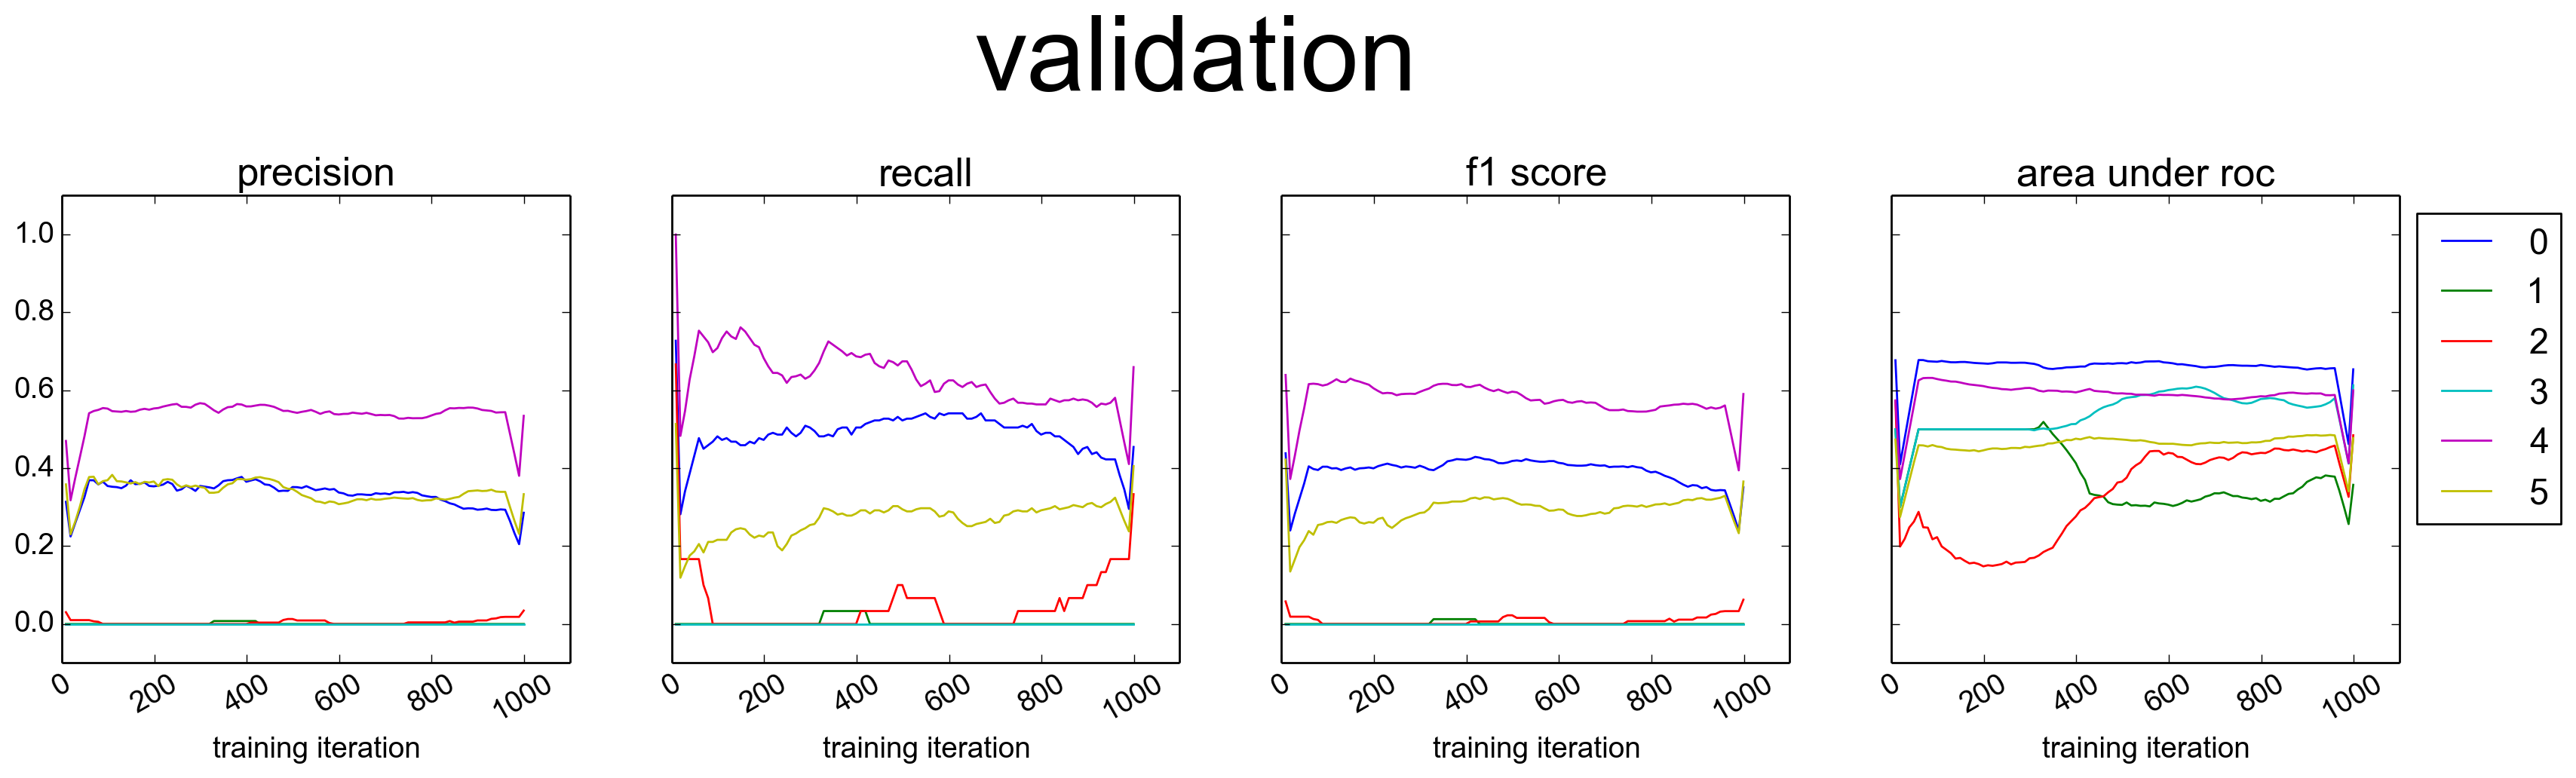

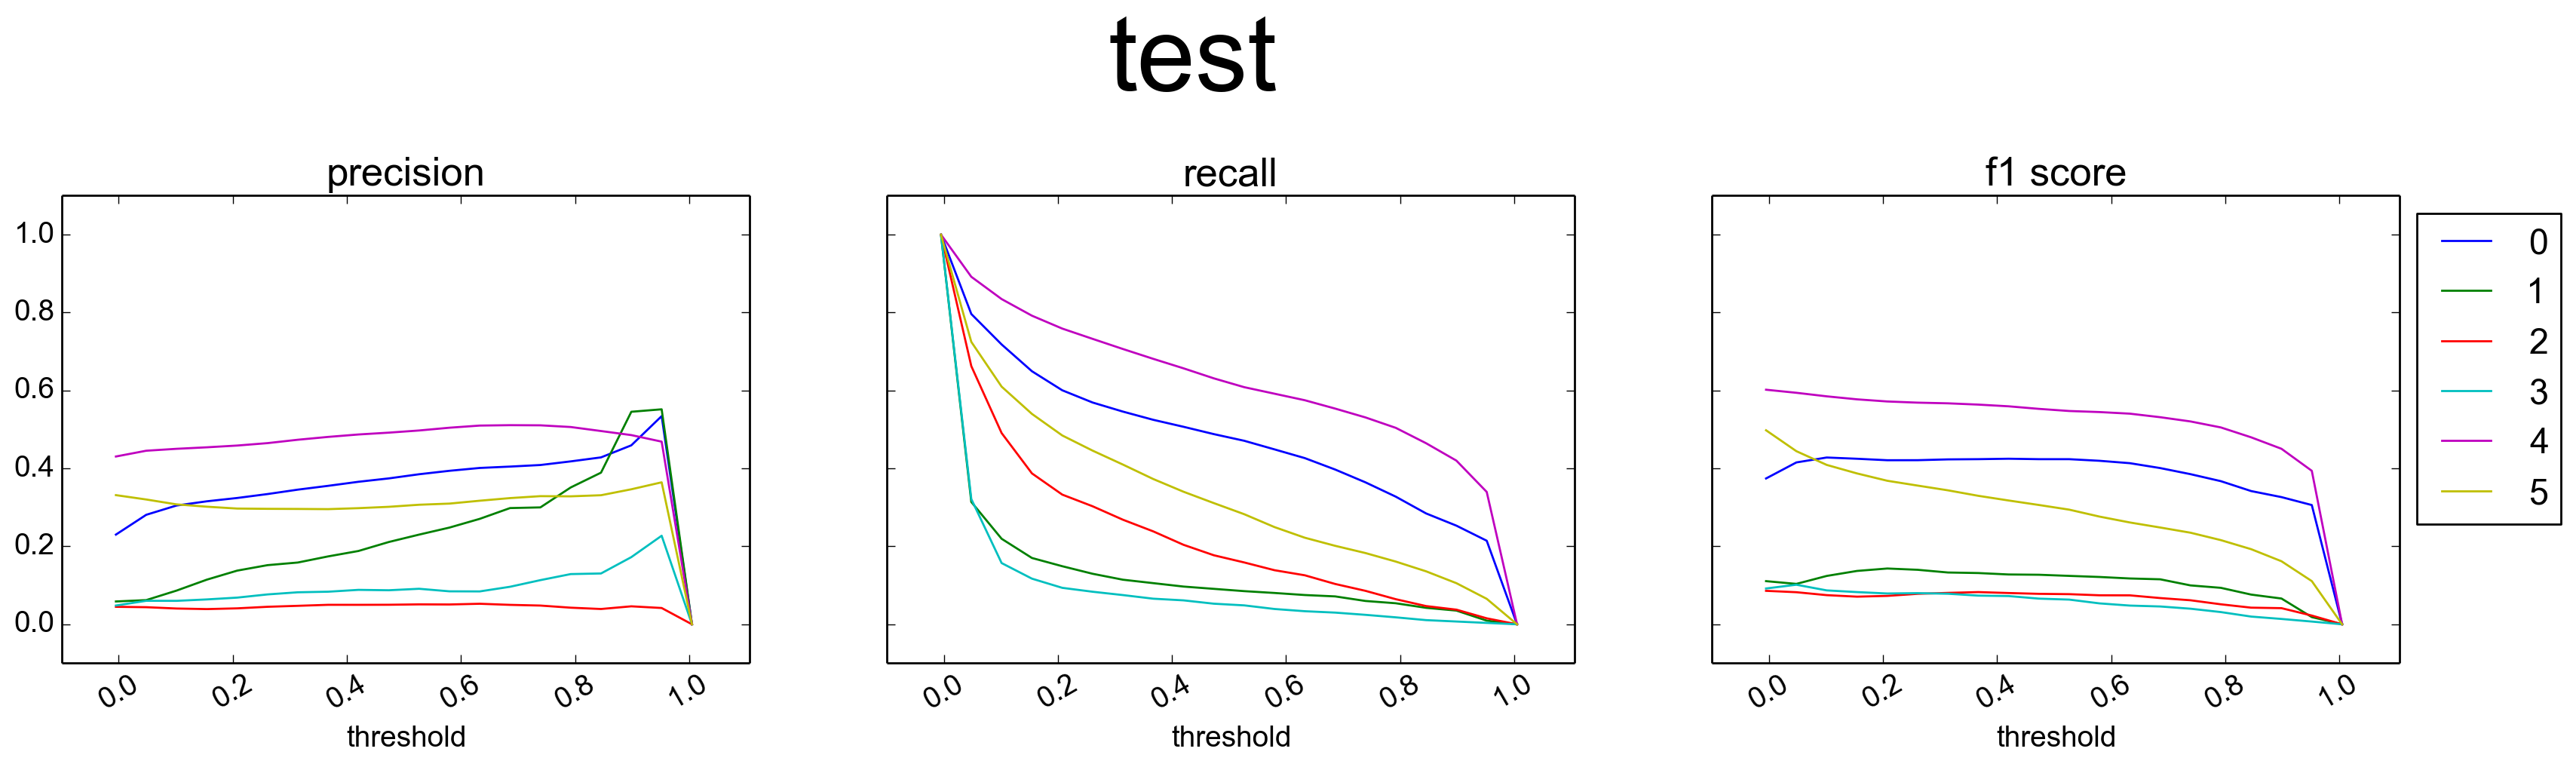

Test ROC values for each class (independant of threshold):
class	roc
0 	0.67 poor
1 	0.52 fail
2 	0.47 fail
3 	0.51 fail
4 	0.57 fail
5 	0.47 fail


In [37]:
au(x_axis,train_auac_axis,'train',True)
au(x_axis,validation_auac_axis,'validation',True)
au(threshold_values,test_threshold_data,'test',False)

In [47]:
t = per_au['test_confusion']
print t.shape
i = 10
print 'Test iteration ', i
print t[i].shape
for j in xrange(t[i].shape[0]):
    print 'Class ', j
    for x in xrange(2):
        for y in xrange(2):
            print round(t[i,j,1-x,1-y]/float(t[i,j,:,:].sum()),2),
        print
    print

(20, 6, 2, 2)
Test iteration  10
(6, 2, 2)
Class  0
0.11 0.12
0.17 0.6

Class  1
0.0 0.05
0.02 0.92

Class  2
0.01 0.04
0.13 0.82

Class  3
0.0 0.05
0.02 0.93

Class  4
0.26 0.17
0.26 0.3

Class  5
0.09 0.24
0.21 0.46

